### 필요한 라이브러리 import

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

### 이미지 준비

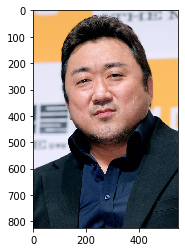

In [17]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_project.jpg'
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (550, 825))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

plt.imshow(img_rgb) # 이미지를 잘 불러왔는지 확인
plt.show()

### 얼굴 검출

rectangles[[(98, 170) (419, 491)]]


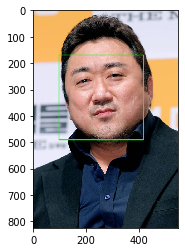

In [18]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 랜드마크 검출

68


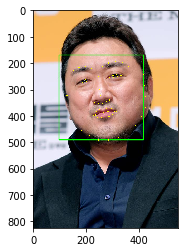

In [19]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 스티커 적용하기

(x,y) : (180,259)
(w,h) : (322,322)
(161, 161, 3)
(161, 161, 3)


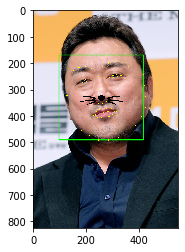

In [20]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
#    x2 = landmark[2][0] # 볼의 좌표를 구하기 위한 랜드마크들 출력
#    y2 = landmark[2][1] 
    
#    x30 = landmark[30][0]
#    y30 = landmark[30][1]
    
#    x36 = landmark[36][0]
#    y36 = landmark[36][1]
    
#    x48 = landmark[48][0]
#    y48 = landmark[48][1]
    
#    x = x2 + (x30 - x2) // 2
#    y = y36 + (y48 - y36) // 2
    
#    x = x - h // 20
#    y = y - h // 4
    x = landmark[37][0] - 5
    y = landmark[37][1] - 8
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 바운딩 박스와 랜드마크 제거

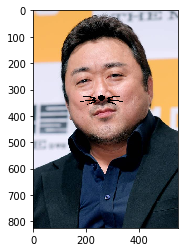

In [21]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 다른 각도의 사진에 적용

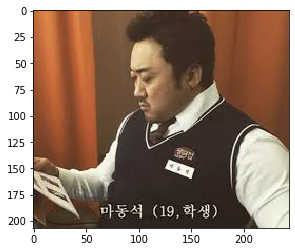

rectangles[[(78, 44) (129, 95)]]


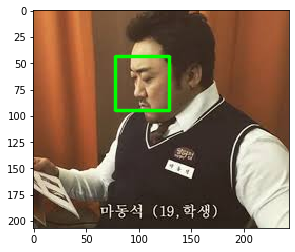

68


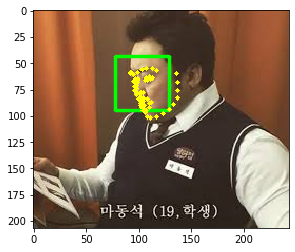

(x,y) : (91,58)
(w,h) : (52,52)
(26, 26, 3)
(26, 26, 3)


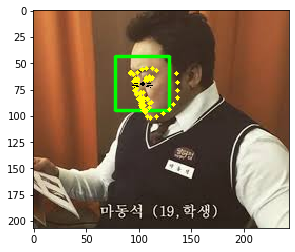

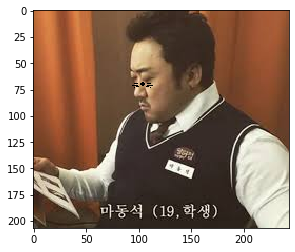

In [44]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_project2.jpg'
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (243, 207))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

plt.imshow(img_rgb) # 이미지를 잘 불러왔는지 확인
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[37][0] - 5
    y = landmark[37][1] - 8
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

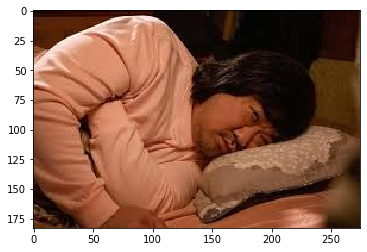

rectangles[]


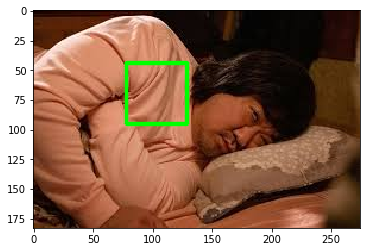

IndexError: list index out of range

In [46]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_project3.jpg'
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (275, 183))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

plt.imshow(img_rgb) # 이미지를 잘 불러왔는지 확인
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[37][0] - 5
    y = landmark[37][1] - 8
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))

rows, cols = img_sticker.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2),20, 1.0)
img_sticker = cv2.warpAffine(img_sticker, M,(cols, rows))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

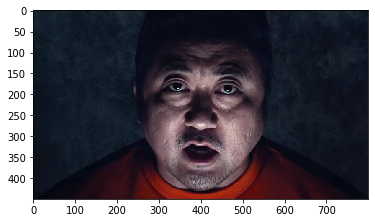

rectangles[[(241, 99) (562, 420)]]


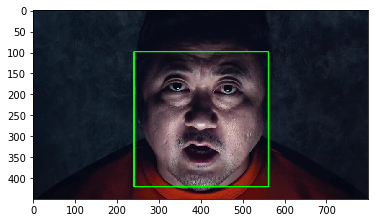

68


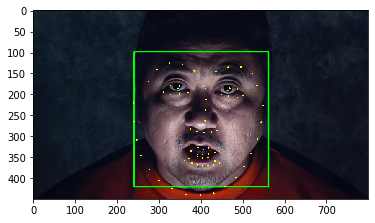

(x,y) : (322,172)
(w,h) : (322,322)
(161, 161, 3)
(161, 161, 3)


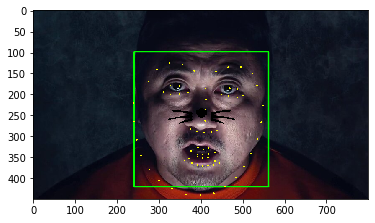

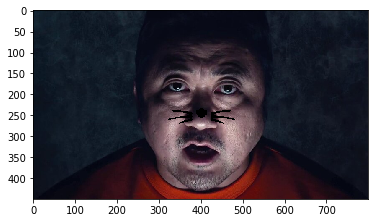

In [43]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_project5.jpg'
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (800, 450))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

plt.imshow(img_rgb) # 이미지를 잘 불러왔는지 확인
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[37][0] - 5
    y = landmark[37][1] - 8
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

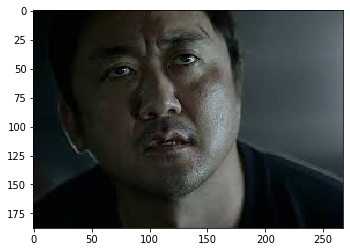

rectangles[[(29, -22) (184, 150)]]


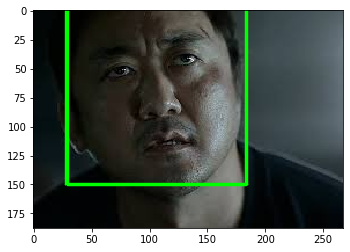

68


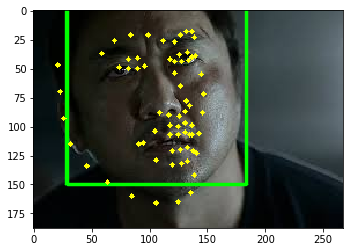

(x,y) : (77,34)
(w,h) : (156,156)
(78, 78, 3)
(78, 78, 3)


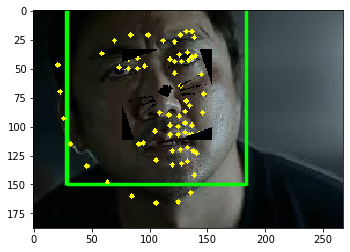

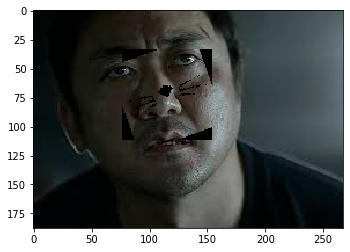

In [41]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_project6.jpg'
img_bgr = cv2.imread(image_path)
img_bgr = cv2.resize(img_bgr, (268, 188))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

plt.imshow(img_rgb) # 이미지를 잘 불러왔는지 확인
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[37][0] - 5
    y = landmark[37][1] - 8
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))

rows, cols = img_sticker.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2),20, 1.0)
img_sticker = cv2.warpAffine(img_sticker, M,(cols, rows))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- **얼굴 각도에 따라 스티커가 어떻게 변해야할까요?**

    고개가 틀어진 방향으로 스티커 이미지를 회전시켜야 얼굴에 어울리게 스티커가 적용될 것입니다.
    처음에 스티커 이미지를 불러올 때, cv2.getRotationMatrix2D() 등의 메서드로 스티커를 회전시켜야 합니다.
    
    
- **멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?**
    
    gradient를 추출한 형태와 기존에 학습한 얼굴의 gradient 형태를 비교해 가장 유사한 구역을 선택하는 방식이므로, 멀리서 촬영하거나 옆으로 누워서 촬영하면 기존에 학습한 형태의 얼굴 gradient와 형태가 달라, 얼굴의 위치를 인식하기 어렵다고 생각합니다.
    위의 이미지들을 보면, 옆 얼굴일 때 얼굴을 제대로 인식하지 못하거나, 얼굴의 위치를 인식한다 해도, 랜드마크의 좌표값을 통해 위치를 지정한 값이 정면을 보고있는 얼굴일 때와 달라서 정면 얼굴에 대해 적용한 방식을 적용하면 스티커의 위치가 제대로 잡히지 않습니다.
    스티커앱은 얼굴을 인식해 특정 위치에 스티커를 입히는 것이므로 얼굴을 인식하지 못하면 작업을 수행할 수 없습니다.
    
    
- **실행 속도가 중요할까요?**
    
    당연히 중요합니다.
    스노우나 비슷한 기능을 하는 앱을 보면 얼굴 위치를 바로 인식하고 스티커를 변경하면 즉시 적용됩니다.
    스티커를 변경할 때마다 얼굴을 다시 인식해야 한다거나 이미지를 불러오고 위치를 변경해야 한다면 아무도 그 앱을 사용하지 않을 것입니다.
    
    
- **스티커앱을 만들 때 정확도가 얼마나 중요할까요?**

    실행 속도만큼이나 정확도도 매우 중요합니다.
    프로젝트를 예를 들면, 콧수염이 눈썹에 위치한다던가, 이마에 위치하면 안됩니다.
    따라서 올바르고 정확하게 얼굴을 인식해야 할 필요가 있습니다.
    

### 회고

#### 생각

- **이미지 회전**

    스티커 이미지를 회전시키는 방법을 찾아, getRotationMatrix2D 메서드를 적용해 회전된 행렬을 얻고, 이 행렬에 warpAffine메서드를 적용했더니 붙이려는 스티커가 회전한 형태로 사진에 적용됐습니다. 사진 속 고개의 각도에 맞춰 콧수염을 회전시켰더니 사진에는 자연스럽게 적용됐지만, 회전한 형태(?)가 남았습니다.이 자국은 아마도 기존의 스티커 이미지에서 회전함으로써 생기는 새로운 부분이 투명하게 처리되지 않고 검은색으로 처리되기 때문에 생기는 것이라고 생각합니다. 사진 배경을 제거해 투명하게 처리할 수 있는 방법을 찾아봐야 할 것 같습니다.
    

- **빛 조건**

    노드 학습 내용 중에, 픽셀을 그대로 인식하지 않고, gradient를 구해서 그 형태를 인식하게 하면 빛 조건과 관계없이 동일한 형태의 표현을 얻을 수 있어, 인식이 수월하다는 내용이 있었습니다.
    그래서 어두운 이미지를 추가해서 적용해봤는데, 얼굴의 위치는 문제없이 인식했지만, 랜드마크를 올바르게 잡지 못하는 문제가 있었습니다.
    랜드마크를 잡는 알고리즘을 학습하거나 직접 구현한 것이 아니어서 어떤 부분에서 어떻게 문제가 생긴 것인지는 모르겠지만, 랜드마크 알고리즘은 빛 조건에 영향을 받는 것 같습니다.
    이 부분에 대해 앞으로 학습하는 내용에서도 살펴보고 알아보고 싶습니다.
  
  
- **이미지 크기 조정**

    이미지를 원래의 이미지 비율을 유지하지 않고, 다른 비율로 변경한 경우 사람이 볼 때는 길쭉하게 늘리긴 했지만, 어떻게 봐도 얼굴이었는데, 모델은 얼굴을 제대로 인식하지 못하는 문제가 있었습니다.
    gradient를 통해 얼굴을 인식해 그 형태가 얼굴이더라도 비율이 달라서 인식이 안되는 것인지에 대한 의문이 생겼습니다.
    

#### 느낀 점

오늘은 학습 과정을 생략하고, 이미 학습된 모델로 프로젝트를 수행했습니다.
따라서 프로젝트 수행 과정은 이전 노드들에 비해 상대적으로 수월했지만, 보완하고 메울 궁금한 점들이 이전 노드들보다 더 많았던 것 같습니다.
모든 프로젝트와 학습 노드에서 생긴 의문점들을 따로 정리하고 있기 때문에, 노드 및 과제를 어느정도 진행한 후 개인적으로 찾아보고, 학습을 더 진행하면서 궁금한 점들을 해결하고 싶습니다.